In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [10]:
#define state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    verdict: str

# defination of the calculate_bmi node function
# every node takes in the state and return the updated state
# in this we are taking the weight and height from the state
# then calculating the bmi and then just return the updated bmi
def cal_bmi(state: BMIState) -> BMIState:
    weight= state['weight_kg']
    height= state['height_m']
    
    bmi=weight/(height**2)

    state['bmi']=round(bmi,2)

    return state
# defination of the calculate_verdict node function
def cal_verdict(state: BMIState) -> BMIState:
    bmi = state['bmi']
    
    if bmi < 18.5:
        verdict = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        verdict = 'Normal weight'
    elif 25 <= bmi < 29.9:
        verdict = 'Overweight'
    else:
        verdict = 'Obesity'
    
    state['verdict'] = verdict

    return state


In [13]:
#define graph
graph= StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_bmi',cal_bmi)
graph.add_node('calculate_verdict', cal_verdict)

#add edges to your graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi', 'calculate_verdict')
graph.add_edge('calculate_verdict', END)


workflow= graph.compile()


In [14]:
#execute the graph
initial_state={'weight_kg':80, 'height_m':1.85}

final_state= workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.85, 'bmi': 23.37, 'verdict': 'Normal weight'}


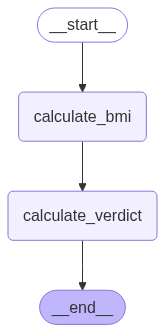

In [12]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())